In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
# upload the dataset
amz = pd.read_csv("Amazon Sales Data.csv")
amz.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
# check the shpae of the dataset

amz.shape

(100, 14)

The Dataset has 100 Rows and 14 columns

In [5]:
# check the null values 
amz.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

The dataset Has no Null values 

In [6]:
# chcek the info
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
# chcek the numeric colummns
amz.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
# drop the unnecessary columns
amz = amz.drop(columns = ["Order ID"])

In [9]:
amz.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75


In [10]:
# change the datatype of the Order Date and Ship Date column to date time type
amz['Order Date'] = pd.to_datetime(amz['Order Date'])
amz['Ship Date'] = pd.to_datetime(amz['Ship Date'])
amz.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [11]:
# Creating the new column 'Delivery Duration'
amz['Delivery Duration'] = amz['Ship Date'] - amz['Order Date']

In [12]:
# Extract year, month, and day from 'Order Date'
amz['Year'] = amz['Order Date'].dt.year
amz['Month'] = amz['Order Date'].dt.month
amz['Day'] = amz['Order Date'].dt.day


In [13]:
# chcek the datset
amz.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery Duration,Year,Month,Day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,30 days,2010,5,28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,24 days,2012,8,22


# Let's do the Univariate Analysis


In [14]:
# check the value counts of Region
amz['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

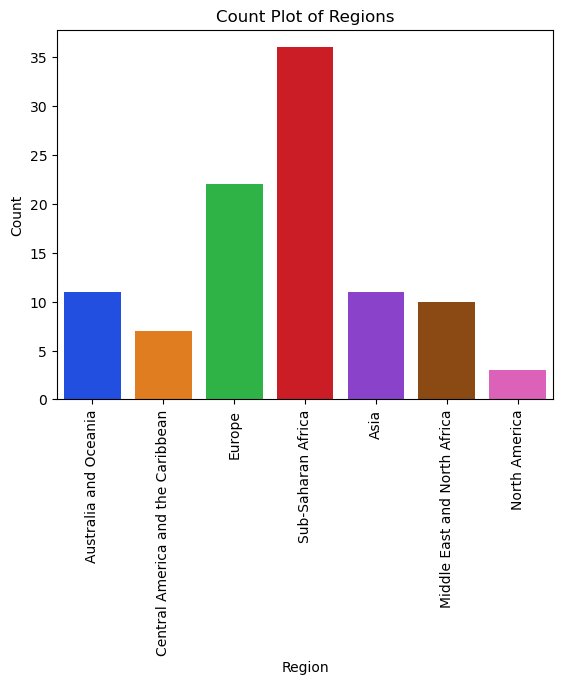

In [15]:
# plot the Regionplt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=amz, palette='bright')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count Plot of Regions')
plt.xticks(rotation=90)
plt.show()

- Most of the Amazon sales occur in Sub-Saharan Africa, followed by Europe. Sales in Australia and Oceania, Asia, the Middle East, and Central America and the Caribbean are moderate. North America has the minimum sales.

In [16]:
# check the value counts for country
amz['Country'].value_counts().sort_values(ascending=False).head(10)

Country
The Gambia               4
Sao Tome and Principe    3
Mexico                   3
Australia                3
Djibouti                 3
Sierra Leone             3
Bulgaria                 2
Mali                     2
Libya                    2
Azerbaijan               2
Name: count, dtype: int64

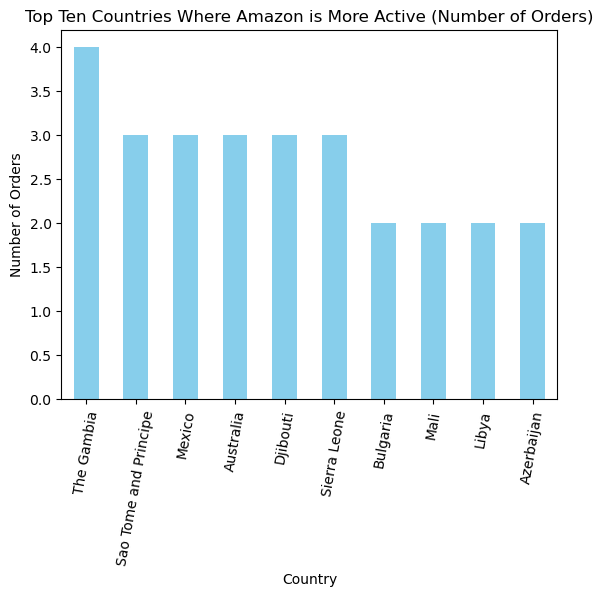

In [17]:
# plot the top 10 country where amazon sales is highly active
country_order_counts = amz['Country'].value_counts().sort_values(ascending=False).head(10)

country_order_counts.plot(kind='bar', color='skyblue')
plt.title('Top Ten Countries Where Amazon is More Active (Number of Orders)')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=80)
plt.show()

- Amazon is most popular in The Gambia. São Tomé and Príncipe, Mexico, Australia, Djibouti, and Sierra Leone have moderate popularity. Bulgaria, Mali, Libya, and Azerbaijan are in the lowest group for popularity.

In [18]:
# value counts of Item Type
amz['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

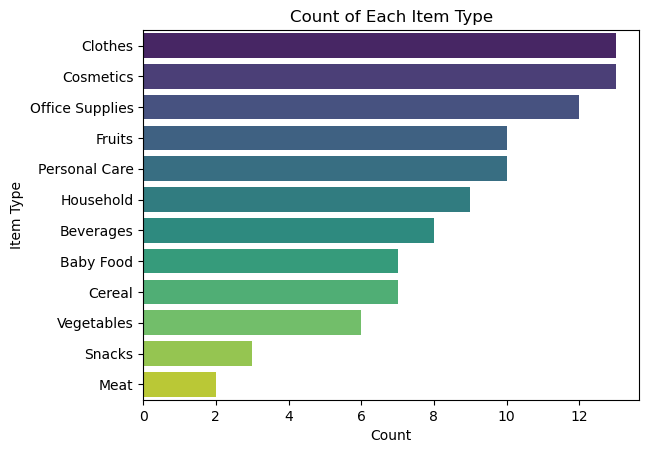

In [19]:
# Create the countplot
sns.countplot(data=amz, y='Item Type', order=amz['Item Type'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Count of Each Item Type')
plt.xlabel('Count')
plt.ylabel('Item Type')

# Display the plot
plt.show()

- Clothes and cosmetics are the most popular items on Amazon. The second most popular category is office supplies. Fruits, personal care, household items, and beverages are the third highest in popularity. Following these, baby food, cereal, and vegetables come next. The least popular items are snacks and meat.

In [20]:
amz['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

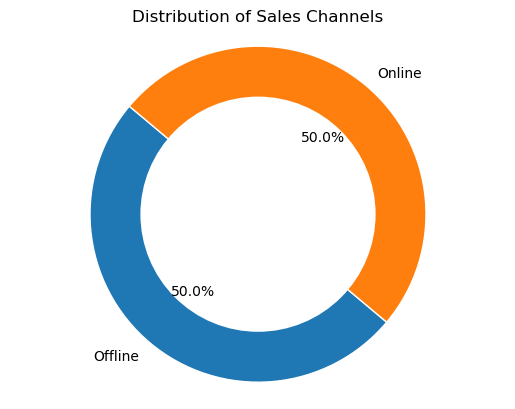

In [21]:
# Count the number of occurrences per sales channel
sales_channel_counts = amz['Sales Channel'].value_counts()

plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Add a white circle at the center to create a doughnut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Sales Channels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- Amazon's sales channels are equally distributed between offline and online.

In [22]:
# value counts of Order Priority
amz['Order Priority'].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

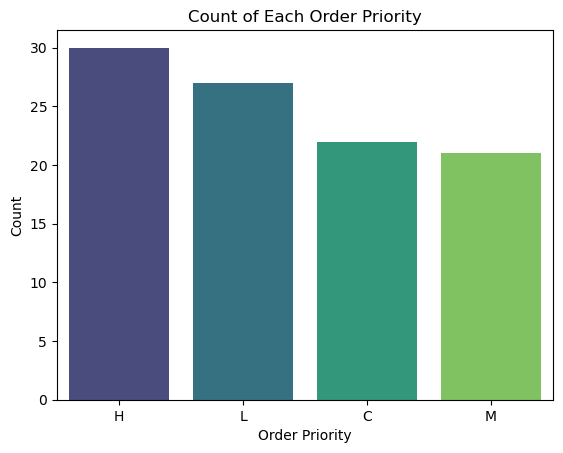

In [23]:

# Create the count plot
sns.countplot(data=amz, x='Order Priority', order=amz['Order Priority'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Count of Each Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Count')

# Display the plot
plt.show()

- In this dataset, Order Priority is given as H, L, C, and M, which mean:

- H = High
- L = Low
- C = Critical
- M = Moderate

The data shows that High Order Priority is the most frequent, followed by Low, Critical, and Moderate.

In [24]:
amz['Total Revenue'].describe()

count    1.000000e+02
mean     1.373488e+06
std      1.460029e+06
min      4.870260e+03
25%      2.687212e+05
50%      7.523144e+05
75%      2.212045e+06
max      5.997055e+06
Name: Total Revenue, dtype: float64

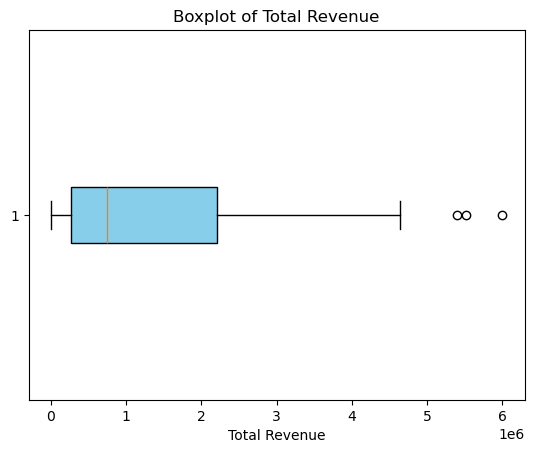

In [25]:


# Create a boxplot for 'Total Cost'
plt.boxplot(amz['Total Revenue'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Add title and labels
plt.title('Boxplot of Total Revenue')
plt.xlabel('Total Revenue')

# Display the plot
plt.show()

- Here we see the boxplot of Total Revenue. The median is between 0 to 1e6. There are also three outliers visible in the data.

C:\Users\SAURADIP PRADHAN\AppData\Local\Temp\ipykernel_740\1705830824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amz['Total Revenue'], bins=10, color='blue')


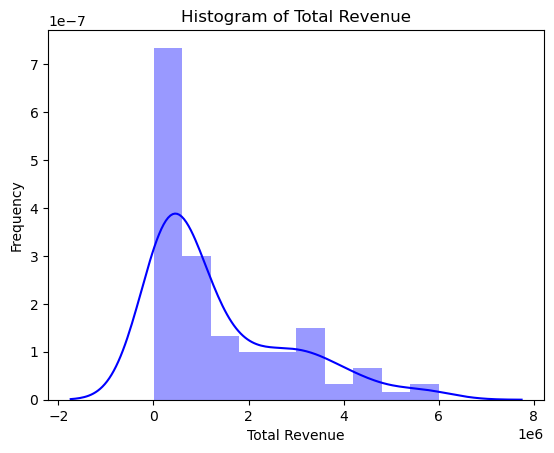

In [26]:


# Create a histogram for 'Total Revenue' with specified bins
sns.distplot(amz['Total Revenue'], bins=10, color='blue')

# Add titles and labels
plt.title('Histogram of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

# Display the plot
plt.show()

- From the histogram, we observe that Total Revenue is at its maximum between 0 and 1e6. The frequency decreases between 1e6 and 2e6, and it becomes very minimal at 6e6. There is no increasing trend after 2e6.

In [27]:
amz['Total Cost'].describe()

count    1.000000e+02
mean     9.318057e+05
std      1.083938e+06
min      3.612240e+03
25%      1.688680e+05
50%      3.635664e+05
75%      1.613870e+06
max      4.509794e+06
Name: Total Cost, dtype: float64

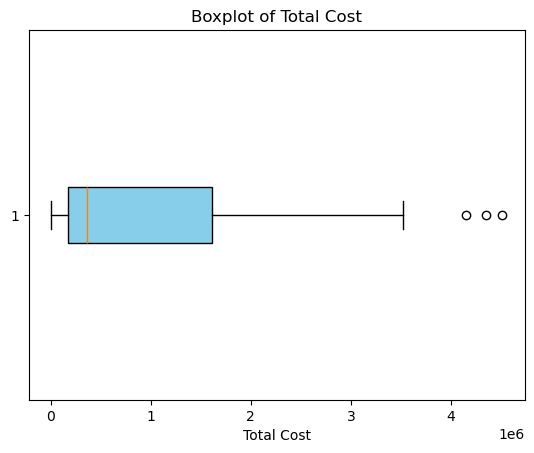

In [28]:

# Create a boxplot for 'Total Cost'
plt.boxplot(amz['Total Cost'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Add title and labels
plt.title('Boxplot of Total Cost')
plt.xlabel('Total Cost')

# Display the plot
plt.show()

- From the box plot of Total Cost, we observe three outliers, and the median is between 0 and 1e6.

C:\Users\SAURADIP PRADHAN\AppData\Local\Temp\ipykernel_740\1235302440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amz['Total Cost'], bins=10, color='blue')


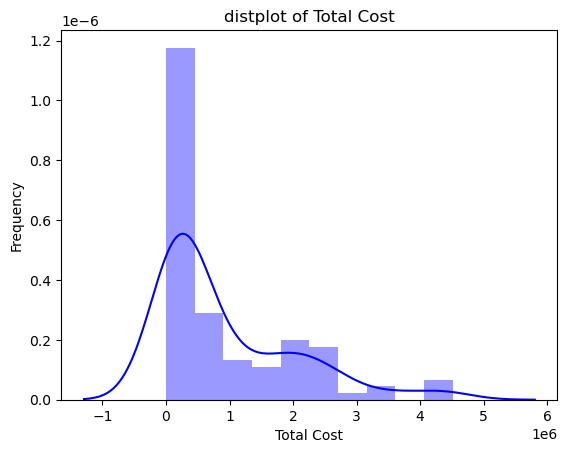

In [29]:

# Create a histogram for 'Total Revenue' with specified bins
sns.distplot(amz['Total Cost'], bins=10, color='blue')

# Add titles and labels
plt.title('distplot of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

# Display the plot
plt.show()

- The maximum Cost is in the O to 1e6. and then the graph start to decrease. and it is mimimum at 4e6

In [30]:
amz['Total Profit'].describe()

count    1.000000e+02
mean     4.416820e+05
std      4.385379e+05
min      1.258020e+03
25%      1.214436e+05
50%      2.907680e+05
75%      6.358288e+05
max      1.719922e+06
Name: Total Profit, dtype: float64

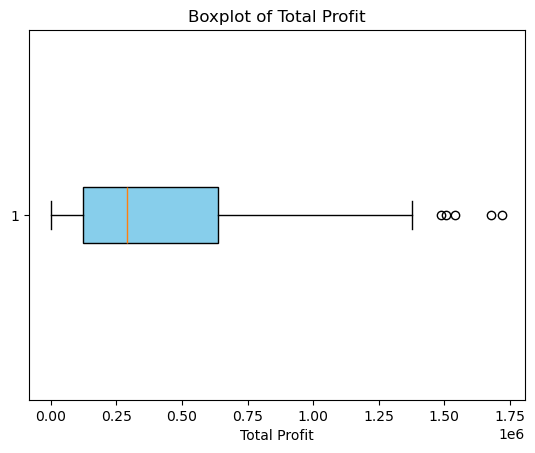

In [31]:


# Create a boxplot for 'Total Cost'
plt.boxplot(amz['Total Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Add title and labels
plt.title('Boxplot of Total Profit')
plt.xlabel('Total Profit')

# Display the plot
plt.show()

- We see that there is five outliers in the boxplot of the total profit boxplot. The mean of the total profit is between in th o.25 1e6 to 0.50 1e6.

C:\Users\SAURADIP PRADHAN\AppData\Local\Temp\ipykernel_740\2378882597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amz['Total Profit'], bins=10, color='blue')


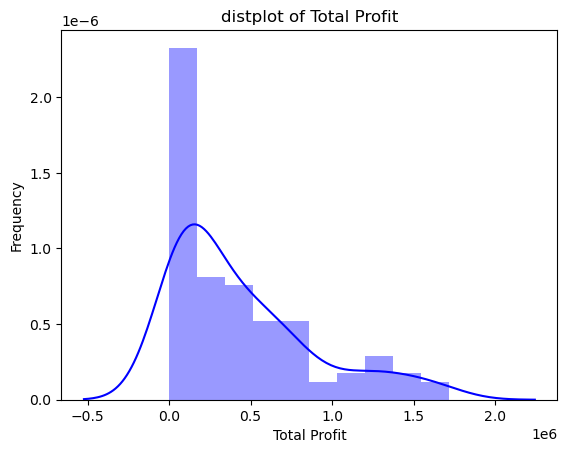

In [32]:


# Create a histogram for 'Total Revenue' with specified bins
sns.distplot(amz['Total Profit'], bins=10, color='blue')

# Add titles and labels
plt.title('distplot of Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')

# Display the plot
plt.show()

- The total profit is highest between 0 and 0.5 million (1e6). After 0.5 million, the graph decreases, and it remains low around 1.5 million (1.5e6).

In [33]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Region             100 non-null    object         
 1   Country            100 non-null    object         
 2   Item Type          100 non-null    object         
 3   Sales Channel      100 non-null    object         
 4   Order Priority     100 non-null    object         
 5   Order Date         100 non-null    datetime64[ns] 
 6   Ship Date          100 non-null    datetime64[ns] 
 7   Units Sold         100 non-null    int64          
 8   Unit Price         100 non-null    float64        
 9   Unit Cost          100 non-null    float64        
 10  Total Revenue      100 non-null    float64        
 11  Total Cost         100 non-null    float64        
 12  Total Profit       100 non-null    float64        
 13  Delivery Duration  100 non-null    timedelta64[ns]


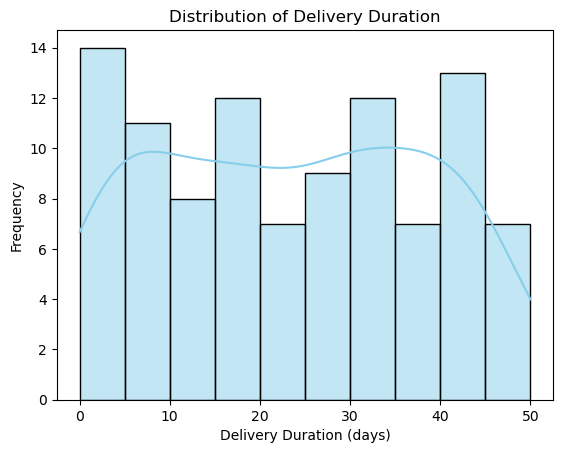

In [34]:
# Convert 'Delivery Duration' from timedelta to days
amz['Delivery Duration (days)'] = amz['Delivery Duration'].dt.days

# Remove any NaN values if present
amz_clean = amz.dropna(subset=['Delivery Duration (days)'])



# Create a distribution plot (distplot) for 'Delivery Duration (days)'
sns.histplot(amz_clean['Delivery Duration (days)'], kde=True, bins=10, color='skyblue')

# Add titles and labels
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (days)')
plt.ylabel('Frequency')
plt.show()

- The delivery duration is highest between 0 to 5 days and also between 40 to 45 days. It is lowest between 20 to 30 days.

In [35]:
print(amz['Year'].value_counts())
print(amz['Month'].value_counts())


Year
2012    22
2014    15
2013    12
2011    12
2015    11
2010    10
2016    10
2017     8
Name: count, dtype: int64
Month
2     13
7     12
5     11
10    11
6     10
4      9
11     9
1      7
12     5
9      5
8      4
3      4
Name: count, dtype: int64


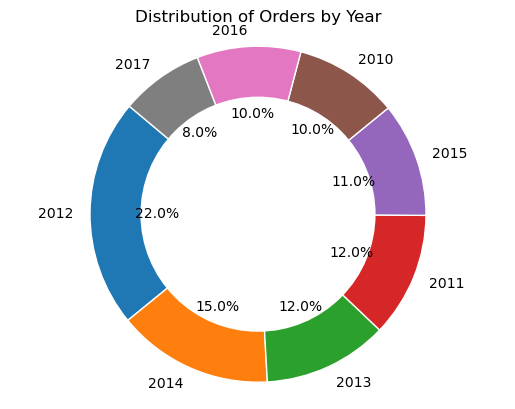

In [36]:
# Count the number of occurrences per year
year_counts = amz['Year'].value_counts()

plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Add a white circle at the center to create a doughnut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Orders by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- We observe that the percentage of orders placed increased from 2010 onwards. In 2010, it was 10%. It gradually increased to 12% in 2011 and 22% in 2012, reaching its peak. However, there was a sudden decrease afterwards. In 2013, it was 12%, and in 2014, it was 15%. By 2016 and 2017, the percentage of orders placed dropped to 10% and 8%, respectively, marking the lowest points in the trend.

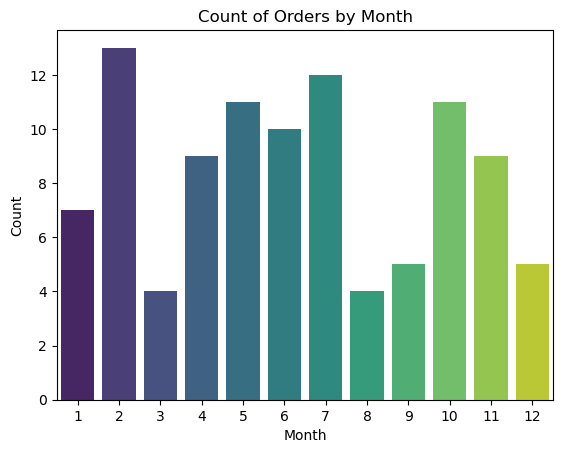

In [37]:


# Create the countplot for 'Month'
sns.countplot(data=amz, x='Month', order=range(1, 13), palette='viridis')

# Add title and labels
plt.title('Count of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

- We observe that in February and July, the orders placed are the highest. In May and October, they are the second highest. In January, April, June, and November, the orders are moderate. Orders are limited in the other months.

In [38]:

# Define function to categorize based on quartiles
def categorize_column(column):
    q1 = column.quantile(0.25)
    q2 = column.quantile(0.50)
    q3 = column.quantile(0.75)
    
    categories = pd.cut(column, bins=[-float('inf'), q1, q2, q3, float('inf')], labels=['Low', 'Medium', 'High', 'Maximum'])
    return categories

# Create new columns based on quartiles
amz['Revenue Category'] = categorize_column(amz['Total Revenue'])
amz['Cost Category'] = categorize_column(amz['Total Cost'])
amz['Profit Category'] = categorize_column(amz['Total Profit'])

# Display the first few rows to verify the new columns
print(amz[['Total Revenue', 'Revenue Category', 'Total Cost', 'Cost Category', 'Total Profit', 'Profit Category']].head())


   Total Revenue Revenue Category  Total Cost Cost Category  Total Profit  \
0     2533654.00          Maximum  1582243.50          High     951410.50   
1      576782.80           Medium   328376.44        Medium     248406.36   
2     1158502.59             High   933903.84          High     224598.75   
3       75591.66              Low    56065.84           Low      19525.82   
4     3296425.02          Maximum  2657347.52       Maximum     639077.50   

  Profit Category  
0         Maximum  
1          Medium  
2          Medium  
3             Low  
4         Maximum  


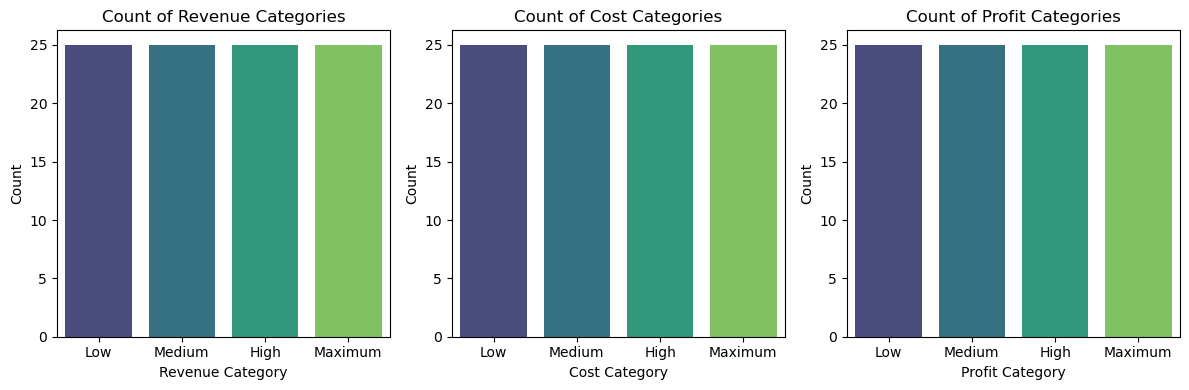

In [39]:

# Set up the figure size for better readability
plt.figure(figsize=(12, 4))

# Plot count plot for Revenue Category
plt.subplot(1, 3, 1)
sns.countplot(data=amz, x='Revenue Category', palette='viridis', order=['Low', 'Medium', 'High', 'Maximum'])
plt.title('Count of Revenue Categories')
plt.xlabel('Revenue Category')
plt.ylabel('Count')

# Plot count plot for Cost Category
plt.subplot(1, 3, 2)
sns.countplot(data=amz, x='Cost Category', palette='viridis', order=['Low', 'Medium', 'High', 'Maximum'])
plt.title('Count of Cost Categories')
plt.xlabel('Cost Category')
plt.ylabel('Count')

# Plot count plot for Profit Category
plt.subplot(1, 3, 3)
sns.countplot(data=amz, x='Profit Category', palette='viridis', order=['Low', 'Medium', 'High', 'Maximum'])
plt.title('Count of Profit Categories')
plt.xlabel('Profit Category')
plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


- There is no such trend in the Revenue Category, Cost Category and Profit Category

- ## Let's Do the Multivariate Analysis

In [40]:
amz.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,...,Total Cost,Total Profit,Delivery Duration,Year,Month,Day,Delivery Duration (days),Revenue Category,Cost Category,Profit Category
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,...,1582243.50,951410.50,30 days,2010,5,28,30,Maximum,High,Maximum
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,...,328376.44,248406.36,24 days,2012,8,22,24,Medium,Medium,Medium
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,1779,651.21,524.96,...,933903.84,224598.75,6 days,2014,5,2,6,High,High,Medium
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,8102,9.33,6.92,...,56065.84,19525.82,15 days,2014,6,20,15,Low,Low,Low
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,5062,651.21,524.96,...,2657347.52,639077.50,5 days,2013,2,1,5,Maximum,Maximum,Maximum


In [41]:
amz.isnull().sum()

Region                      0
Country                     0
Item Type                   0
Sales Channel               0
Order Priority              0
Order Date                  0
Ship Date                   0
Units Sold                  0
Unit Price                  0
Unit Cost                   0
Total Revenue               0
Total Cost                  0
Total Profit                0
Delivery Duration           0
Year                        0
Month                       0
Day                         0
Delivery Duration (days)    0
Revenue Category            0
Cost Category               0
Profit Category             0
dtype: int64

In [42]:
# Save the DataFrame to a CSV file
amz.to_csv('amazon_details_sales.csv', index=False)

In [43]:
import os
print(os.getcwd())


C:\Users\SAURADIP PRADHAN\Downloads\Unified Projecyts\Amazon


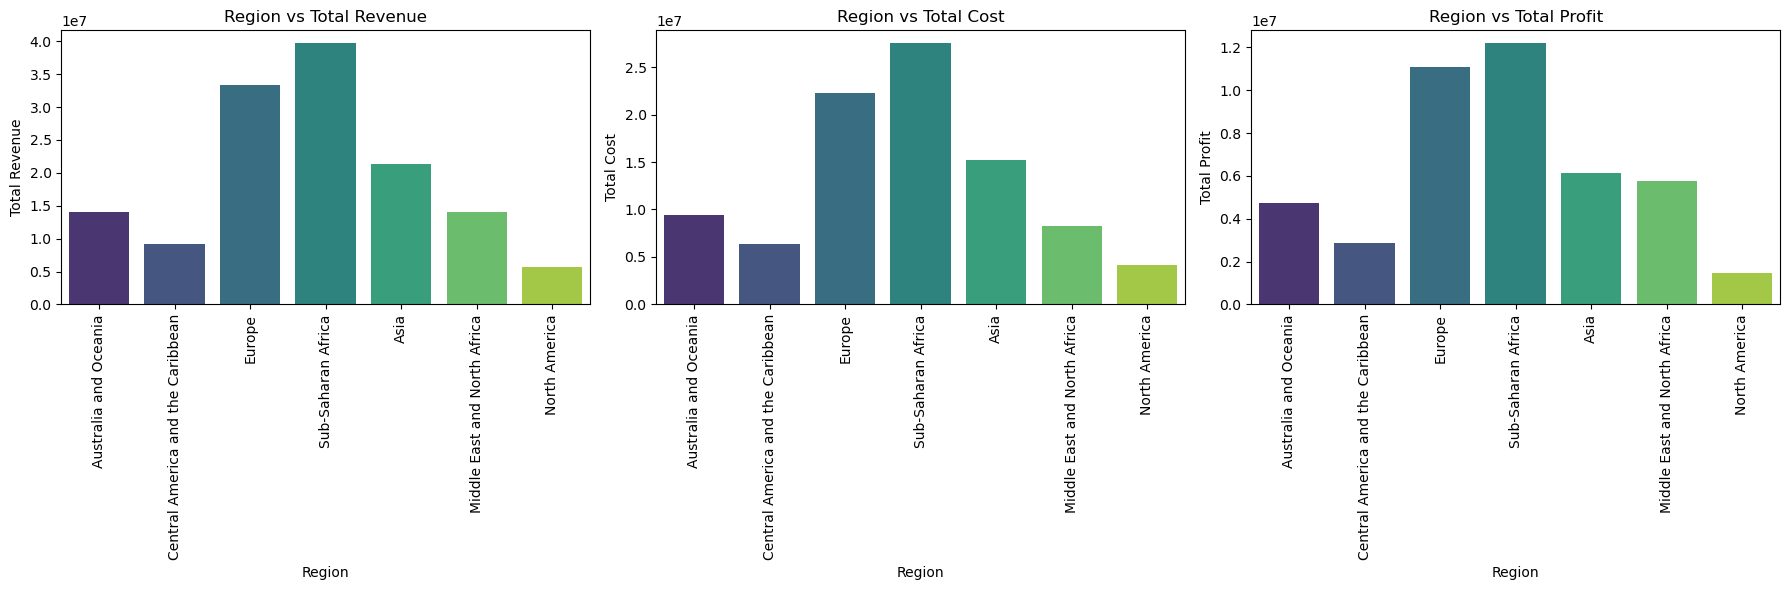

In [44]:
# Set up the figure size for better readability
plt.figure(figsize=(18, 6))

# Plot Region vs Total Revenue
plt.subplot(1, 3, 1)
sns.barplot(data=amz, x='Region', y='Total Revenue', estimator=sum, ci=None, palette='viridis')
plt.title('Region vs Total Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)

# Plot Region vs Total Cost
plt.subplot(1, 3, 2)
sns.barplot(data=amz, x='Region', y='Total Cost', estimator=sum, ci=None, palette='viridis')
plt.title('Region vs Total Cost')
plt.xlabel('Region')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)

# Plot Region vs Total Profit
plt.subplot(1, 3, 3)
sns.barplot(data=amz, x='Region', y='Total Profit', estimator=sum, ci=None, palette='viridis')
plt.title('Region vs Total Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


- Here we see that Total Revenue, Total Profit, and Total Cost are highest in Sub-Saharan Africa and Europe. Australia and Oceania, Asia, and the Middle East and North Africa are moderate in these three fields. Central America and the Caribbean, and North America have the lowest values.
and The Total Revenue ,Total Profit and Total Cost are distributed equally.t.

In [ ]:
# Calculate the total revenue, total cost, and total profit for each country
country_totals = amz.groupby('Country').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Identify the top 10 countries by Total Revenue
top_10_countries = country_totals.nlargest(10, 'Total Revenue')['Country']
# Filter the dataset to include only the top 10 countries
top_10_data = amz[amz['Country'].isin(top_10_countries)]

# Set up the figure size for better readability
plt.figure(figsize=(18, 6))

# Plot Country vs Total Revenue
plt.subplot(1, 3, 1)
sns.barplot(data=top_10_data, x='Country', y='Total Revenue', estimator=sum, ci=None, palette='viridis')
plt.title('Top 10 Countries vs Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation= 90)

# Plot Country vs Total Cost
plt.subplot(1, 3, 2)
sns.barplot(data=top_10_data, x='Country', y='Total Cost', estimator=sum, ci=None, palette='viridis')
plt.title('Top 10 Countries vs Total Cost')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)

# Plot Country vs Total Profit
plt.subplot(1, 3, 3)
sns.barplot(data=top_10_data, x='Country', y='Total Profit', estimator=sum, ci=None, palette='viridis')
plt.title('Top 10 Countries vs Total Profit')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


- In case of Total revenue and Total cost The top countries are Honduras, Turkmenistan, Myanmar, Djibouti, Lithuania, and Mexico.
- In Case of Total Profit the top Countries are Djibouti, Myanmar, Honduras  and Azarbaizan

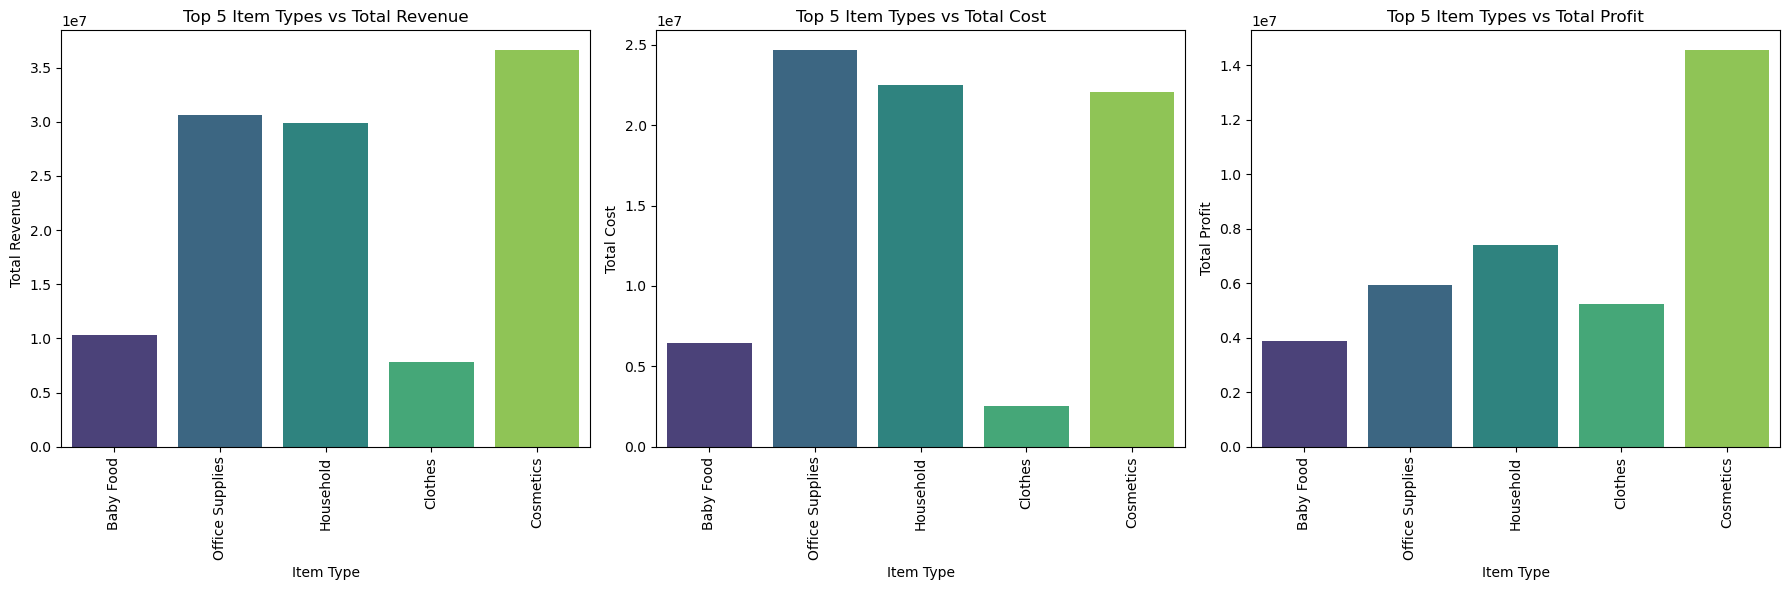

In [46]:
# Calculate the total revenue, total cost, and total profit for each item type
item_type_totals = amz.groupby('Item Type').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Identify the top 5 item types by Total Revenue
top_5_item_types = item_type_totals.nlargest(5, 'Total Revenue')['Item Type']
# Filter the dataset to include only the top 5 item types
top_5_data = amz[amz['Item Type'].isin(top_5_item_types)]

# Set up the figure size for better readability
plt.figure(figsize=(18, 6))

# Plot Item Type vs Total Revenue
plt.subplot(1, 3, 1)
sns.barplot(data=top_5_data, x='Item Type', y='Total Revenue', estimator=sum, ci=None, palette='viridis')
plt.title('Top 5 Item Types vs Total Revenue')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)

# Plot Item Type vs Total Cost
plt.subplot(1, 3, 2)
sns.barplot(data=top_5_data, x='Item Type', y='Total Cost', estimator=sum, ci=None, palette='viridis')
plt.title('Top 5 Item Types vs Total Cost')
plt.xlabel('Item Type')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)

# Plot Item Type vs Total Profit
plt.subplot(1, 3, 3)
sns.barplot(data=top_5_data, x='Item Type', y='Total Profit', estimator=sum, ci=None, palette='viridis')
plt.title('Top 5 Item Types vs Total Profit')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


- The Total Revenue of cosmetics is high, and the Total Cost is low compared to the Total Revenue, making it the second highest. Total Profit is high compared to other categories but relatively low compared to the Total Revenue.
- The Total Revenue for Other Suppliers is the second highest, and the Total Cost is the highest. The Total Profit for Other Suppliers is not very good.
- The same pattern is observed for household products.
- Revenue, Cost, and Profit are equally distributed for baby food.
- The Total Profit for clothes is high compared to its Total Cost and Revenue, but the Total Revenue for clothes is minimal.

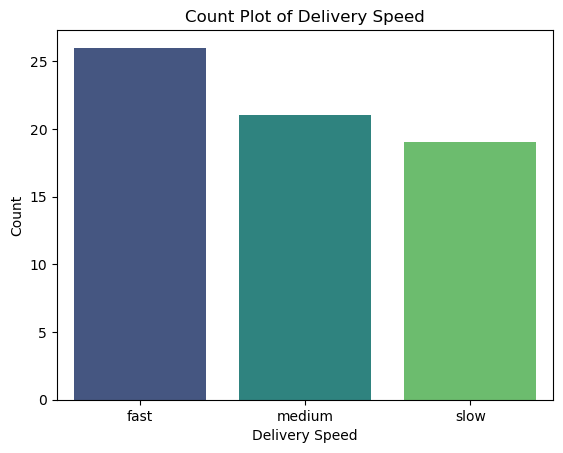

In [47]:
# Categorize the Delivery Duration into 'fast', 'medium', and 'slow'
amz['Delivery Speed'] = pd.cut(
    amz['Delivery Duration'].dt.days,
    bins=[-1, 10, 20, 31],
    labels=['fast', 'medium', 'slow']
)


sns.countplot(data=amz, x='Delivery Speed', palette='viridis')
plt.title('Count Plot of Delivery Speed')
plt.xlabel('Delivery Speed')
plt.ylabel('Count')

# Display the plot
plt.show()


- Amazon Delivary is Fast maximum time.

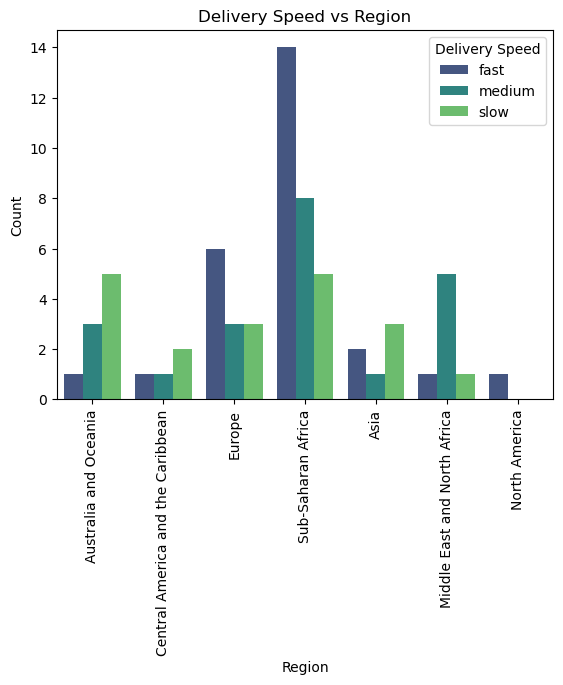

In [48]:

sns.countplot(data=amz, x='Region', hue='Delivery Speed', palette='viridis')
plt.title('Delivery Speed vs Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Display the plot
plt.show()

- In sub-saharn Africa, Europe, North america the amazon delivary is  mostly fast.
- In Austraila and Oceania, Asia,Central amrecia and the caribbean the amazon delivary is Slow
- In the Middle East and North Africa the amazon delivary is medium.


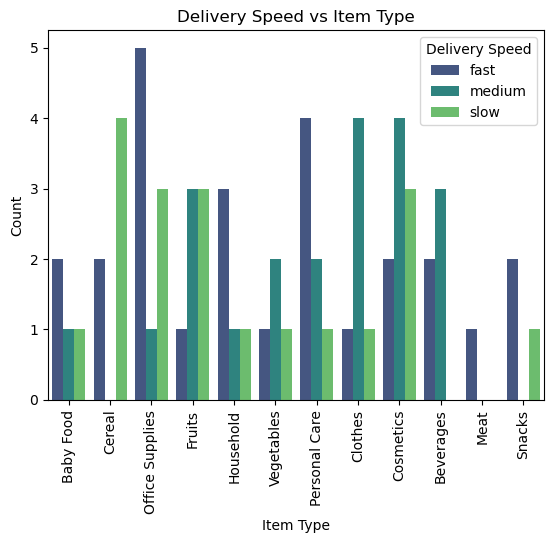

In [49]:

sns.countplot(data=amz, x='Item Type', hue='Delivery Speed', palette='viridis')
plt.title('Delivery Speed vs Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation= 90)

# Display the plot
plt.show()

- Office Supplies and personal care products are deliverd with in few days of order placed
- cloths, cosmetics,vegetables, fruits  and beverages are deliverd medium delivery speed
- cereal, fruits  are deliverd very slow speed. its taking time

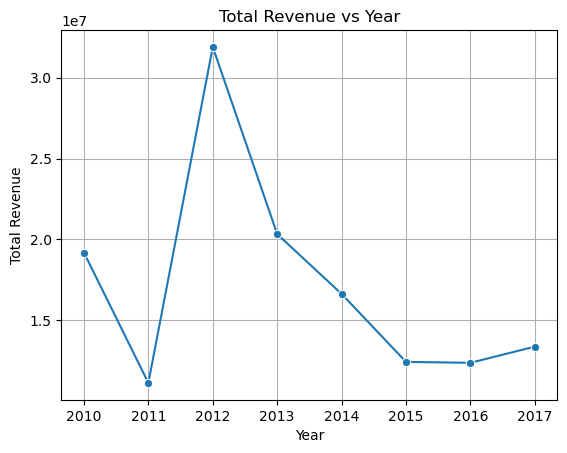

In [50]:
# Aggregate Total Revenue by Year
yearly_Revenue = amz.groupby('Year')['Total Revenue'].sum().reset_index()

sns.lineplot(data=yearly_Revenue, x='Year', y='Total Revenue', marker='o', linestyle='-')
plt.title('Total Revenue vs Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

# Display the plot
plt.show()

- from 2010 Total Revenue decrese and in 2011 it is vey low. In 2012 at its peak. After that it started to decrease upto 2015. 2015 and 2016 has continious graph. from 2016 there is a slight increse trend to 2017.

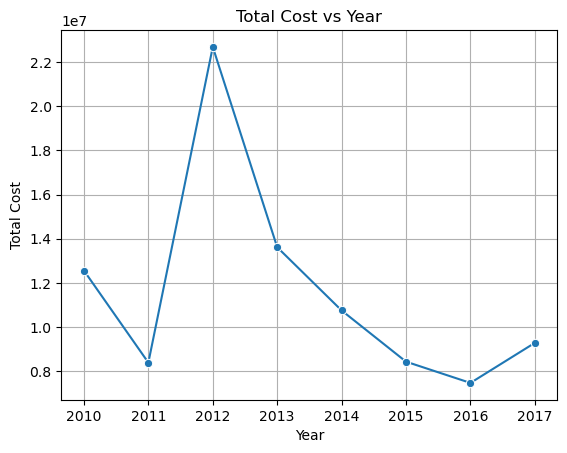

In [51]:
# Aggregate Total Cost by Year
yearly_cost = amz.groupby('Year')['Total Cost'].sum().reset_index()

sns.lineplot(data=yearly_cost, x='Year', y='Total Cost', marker='o', linestyle='-')
plt.title('Total Cost vs Year')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.grid(True)

# Display the plot
plt.show()

- Total cost is also decrease from 2010 to 2011. and go to its peak in 2012. after that it also started to decrease upto 2016. and then there is a clear increse line towards 2017

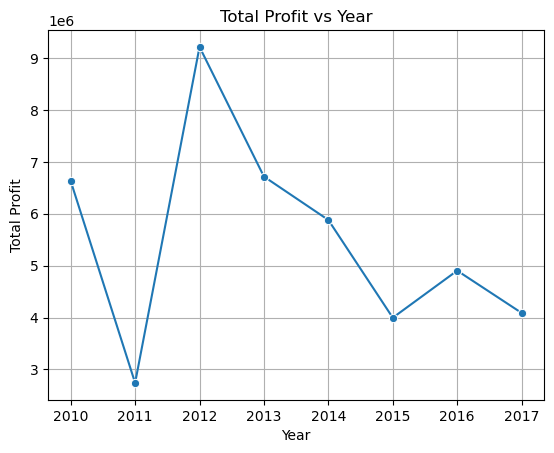

In [52]:
# Aggregate Total Profit by Year
yearly_profit = amz.groupby('Year')['Total Profit'].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=yearly_profit, x='Year', y='Total Profit', marker='o', linestyle='-')
plt.title('Total Profit vs Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)

# Display the plot
plt.show()


- Total Profit is also decrease in 2011 from 2010. Maximum profit is in 2012. after that it also started to fall upto 2017

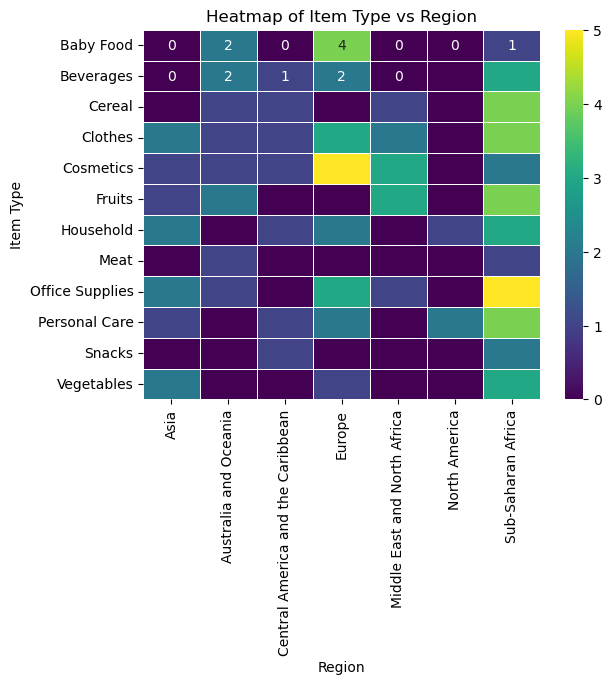

In [53]:
# Create a pivot table to aggregate data
item_region_pivot = amz.pivot_table(index='Item Type', columns='Region', aggfunc='size', fill_value=0)
# Plot the heatmap
sns.heatmap(item_region_pivot, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Heatmap of Item Type vs Region')
plt.xlabel('Region')
plt.ylabel('Item Type')

# Display the plot
plt.show()

- In Asia, clothes, household items, office supplies, and vegetables are moderately demanded items.
- In Australia and Oceania, baby food, beverages, and fruits are moderately demanded items.
- There are no items with high demand in Central America and the Caribbean.
- In Europe, cosmetics are highly demanded, followed by clothes, baby food, and office supplies, which are moderately demanded.
- In the Middle East and North Africa, cosmetics and fruits are moderately demanded items.
- There are no items with high demand in North America.
- In Sub-Saharan Africa, office supplies are highly demanded, while cereal, clothes, fruits, and personal care items are moderately demanded.

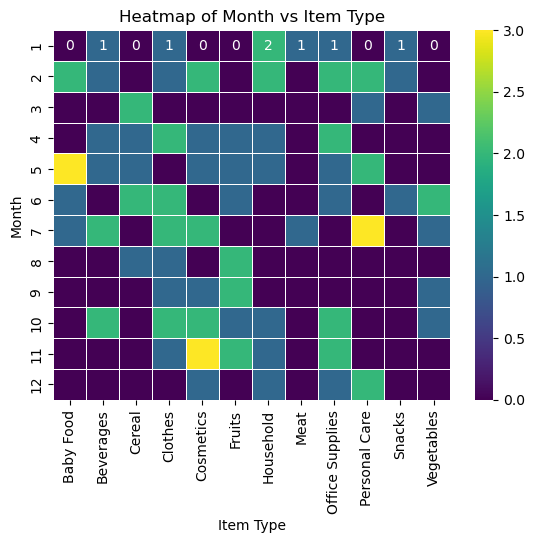

In [54]:

# Create a pivot table to aggregate data
month_item_pivot = amz.pivot_table(index='Month', columns='Item Type', aggfunc='size', fill_value=0)
# Plot the heatmap
sns.heatmap(month_item_pivot, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Heatmap of Month vs Item Type')
plt.xlabel('Item Type')
plt.ylabel('Month')

# Display the plot
plt.show()

- The demand for baby food is high in May.
- The demand for cosmetics is high in November.
- The demand for personal care items is high in July.